# gdp per capita and hk total generated per capita

Model Summary:
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0468      0.055     19.165      0.000       0.932       1.162
HK GDP per capita  -7.16e-07   1.76e-07     -4.075      0.001   -1.09e-06   -3.47e-07

R-squared: 0.4799


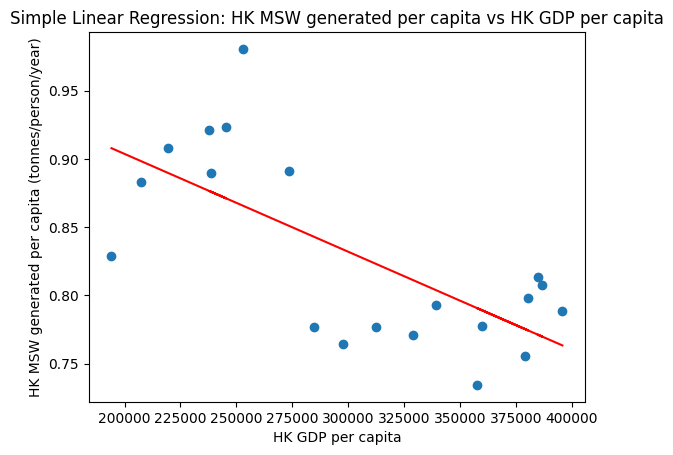

In [3]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

### Simple Linear Regression: HK MSW generated per capita vs HK GDP per capita

# Prepare data
df['HK GDP per capita'] = pd.to_numeric(df['HK GDP per capita'], errors='coerce')
df['HK total MSW generated (tonnes)'] = pd.to_numeric(
    df['HK total MSW generated (tonnes)'], errors='coerce'
)
df['HK total population (mid-year)'] = pd.to_numeric(
    df['HK total population (mid-year)'], errors='coerce'
)

# Calculate yearly MSW generated per capita (tonnes per person per year)
df['HK MSW generated per capita (tonnes/person/year)'] = (
    df['HK total MSW generated (tonnes)'] / df['HK total population (mid-year)']
)

# Drop rows with missing values in either variable (this fixes the NaN error)
mask = (
    df['HK GDP per capita'].notna()
    & df['HK MSW generated per capita (tonnes/person/year)'].notna()
)
X2 = df.loc[mask, ['HK GDP per capita']]
y = df.loc[mask, 'HK MSW generated per capita (tonnes/person/year)']

# Fit model using sklearn for predictions
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

# Fit model using statsmodels for statistical tests
X2_sm = sm.add_constant(X2)  # Add constant term for intercept
model = sm.OLS(y, X2_sm)
results = model.fit()

# Predictions for plotting
y_pred2 = lin_reg2.predict(X2)

print("Model Summary:")
print(results.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results.rsquared:.4f}")

# Plot
plt.scatter(X2, y)
plt.plot(X2, y_pred2, color='red')
plt.xlabel('HK GDP per capita')
plt.ylabel('HK MSW generated per capita (tonnes/person/year)')
plt.title('Simple Linear Regression: HK MSW generated per capita vs HK GDP per capita')
plt.show()


**GDP per capita coefficient ($\hat \beta_1$) ≈ −7.16 × 10^{-7} (p ≈ 0.0007 < 0.05)**  

- There is a **statistically significant negative association** between HK GDP per capita and the **amount of MSW generated per capita per year**. As GDP per capita increases, the quantity of waste generated per person per year tends to **decrease slightly**, suggesting that higher income levels are associated with lower per-capita waste generation.  

- The **R-squared is moderate (~0.48)**, meaning GDP per capita explains **around 48% of the variation** in annual per-capita MSW generation; the remaining variation is likely driven by other factors such as waste-reduction policies, changes in consumption behaviour, recycling efforts, and demographic or structural shifts in the economy.
